### 데이터 불러오기
 Pandas의 read_csv를 통해 csv 파일을 데이터 프레임의 형태로 불러올 수 있는데, 이를 Print로 출력해 보면 데이터의 내용을 확인 할 수 있다.
 예제에서는 데이터의 앞2개행만 출력

변수들 : Passengerld (승객고유번호), 

Survived (생존여부, 1 = 생존, 0 = 사망)

Pclass (티켓클래스, 1 = 1st , 2 = 2nd, 3 = 3rd),

Name, Sex, Ticker (티켓번호), Cabin (객실번호), 

Age

Embarked (승선항, C = Cherbourg, Q = Queenstown, S = Southampton)는 질적변수로 볼 수 있다.

SibSp(동승한 형제자매 및 배우자 의 수), 

Parch (동승한 부모 및 자녀의 수), 

Fare는 양적변수로 판단 할 수 있다.


In [2]:

# [데이터 출처]https://www.kaggle.com/competitions/titanic
from pandas import read_csv
titanic = read_csv('https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/1-1_titanic.csv')

print(titanic.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
# feature 삭제
del_feat = ['PassengerId', 'Cabin']

In [5]:
titanic = titanic.drop(del_feat, axis=1)

In [6]:
# 질적변수의 데이터 타입을 category로 변경
qual = ['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Embarked']
quan = ['Age', 'SibSp', 'Parch', 'Fare']
for col in qual:
    titanic[col] = titanic[col].astype('category')

print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    category
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    category
 8   Fare      891 non-null    float64 
 9   Embarked  889 non-null    category
dtypes: category(6), float64(2), int64(2)
memory usage: 96.2 KB
None


## 기술통계 
.describe()
각 데이터 타입별로 데이터의 기술 통계를 확인 
1. 질적변수에 대해서는 Count, unique, top, freq라는 정보를 제공한다. 
2. 양적 변수에 대해서는 count, mean std, min, 75% max라는 정보를 제공한다. 


In [7]:
print(titanic.describe(include=['float64', 'int64']))

              Age       SibSp       Parch        Fare
count  714.000000  891.000000  891.000000  891.000000
mean    29.699118    0.523008    0.381594   32.204208
std     14.526497    1.102743    0.806057   49.693429
min      0.420000    0.000000    0.000000    0.000000
25%     20.125000    0.000000    0.000000    7.910400
50%     28.000000    0.000000    0.000000   14.454200
75%     38.000000    1.000000    0.000000   31.000000
max     80.000000    8.000000    6.000000  512.329200


In [8]:
print(titanic.describe(include=['category']))


        Survived  Pclass                 Name   Sex Ticket Embarked
count        891     891                  891   891    891      889
unique         2       3                  891     2    681        3
top            0       3  Abbing, Mr. Anthony  male   1601        S
freq         549     491                    1   577      7      644


In [9]:
# 도수분포표
from pandas import DataFrame
freq = DataFrame(titanic['Survived'].value_counts())
print(freq)

          count
Survived       
0           549
1           342


In [10]:
#상대도수분포표
freq['상대도수'] = titanic['Survived'].value_counts(normalize=True)
freq = freq.rename(columns={'Survived':'도수'})

print(freq)

          count      상대도수
Survived                 
0           549  0.616162
1           342  0.383838


In [11]:
#상관계수: 스피어만 순위상관계수, 켄달의 타우
from scipy.stats import spearmanr, kendalltau
corr, p = spearmanr(titanic['Survived'], titanic['Pclass'])
print("spearmanr {:.3f}, p-value = {:.3f}".format(corr, p))

corr2, p2 = spearmanr(titanic['Survived'], titanic['Pclass'])
print("kendalltau {:.3f}, p-value = {:.3f}".format(corr2, p2))

spearmanr -0.340, p-value = 0.000
kendalltau -0.340, p-value = 0.000


In [17]:
print(freq.columns)

Index(['count', '상대도수'], dtype='object')


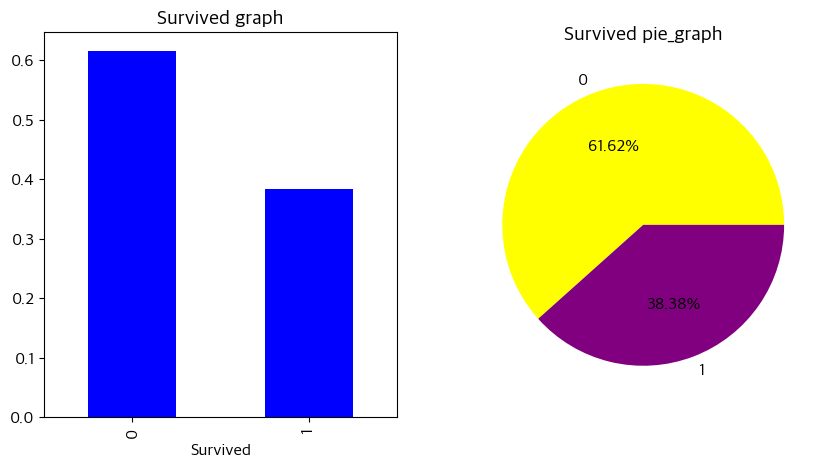

In [24]:
# plotting 환경설정
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5,5) #그래프 크기
plt.rc('font', family='Apple SD Gothic Neo')
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(1,2, figsize=(10,5)) #그래프 구성

#막대 그래프
ax[0].set_title('Survived graph')
freq['상대도수'].plot.bar(ax=ax[0], color='blue')
# 파이 그래프
ax[1].set_title('Survived pie_graph')
ax[1].pie(freq['상대도수'].values,
    labels=freq['상대도수'].index,
    autopct="%.2f%%", colors=['yellow', 'purple'])

plt.show()